In [2]:
import matplotlib.pyplot as plt
import os.path
import sys
sys.path.append('..')

from Helpers.NeuralNetwork import NeuralNetwork

from Data import DatasetClasses

from Helpers import Helpers
from Layers.Conv import Conv
from Layers.FullyConnected import FullyConnected
from Layers.Activations import SoftMax
from Layers.Activations import ReLU
from Layers.Pooling import Pooling
from Layers.Flatten import Flatten
from Layers.Initializers import He

from Optimization.Optimizers import Adam
from Optimization.Loss import CrossEntropyLoss
from Optimization.Constraints import L2_Regularizer

### Dataset


dataset Informations:
--------------------------------------------------
Training samples: 45500
Sample shape: (1, 28, 28)
Number of classes: 10
Test samples: 14000
Dataset size in memory: 355.90 MB


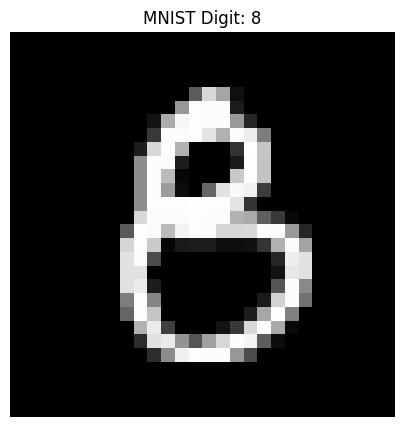

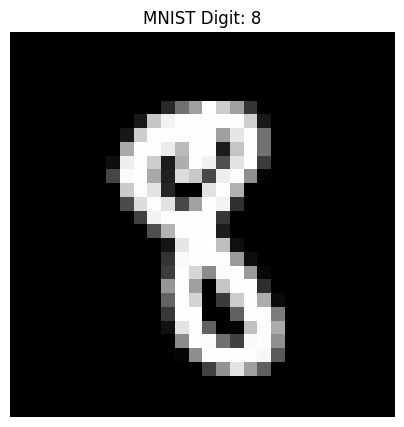

In [3]:
batch_size = 50
mnist = DatasetClasses.MNISTData(batch_size)
mnist.print_dataset_info()
mnist.plot_random_training_sample()

### Architecture Le Net

In [4]:
def build():
    # Create optimizer and regularizer
    optimizer = Adam(learning_rate=5e-4)
    regularizer = L2_Regularizer(alpha=4e-4)
    optimizer.add_regularizer(regularizer)
    Initializer = He()

    # Initialize the network
    net = NeuralNetwork(optimizer, weights_initializer=Initializer, bias_initializer=Initializer)

    # Add layers
    net.append_layer(Conv(stride_shape=(1, 1), convolution_shape=[1, 5, 5], num_kernels=6))  # Conv1
    net.append_layer(ReLU())
    net.append_layer(Pooling(pooling_shape=(2, 2), stride_shape=(2, 2)))  # Pool1

    net.append_layer(Conv(stride_shape=(1, 1), convolution_shape=[6, 5, 5], num_kernels=16))  # Conv2
    net.append_layer(ReLU())
    net.append_layer(Pooling(pooling_shape=(2, 2), stride_shape=(2, 2)))  # Pool2

    net.append_layer(Flatten())  # Flatten
    net.append_layer(FullyConnected(784, 120))  # FC1
    net.append_layer(ReLU())

    net.append_layer(FullyConnected(120, 84))  # FC2
    net.append_layer(ReLU())

    net.append_layer(FullyConnected(84, 10))  # FC3
    net.append_layer(SoftMax())
    net.loss_layer = CrossEntropyLoss()

    return net

Created new model
<class 'Helpers.NeuralNetwork.NeuralNetwork'>


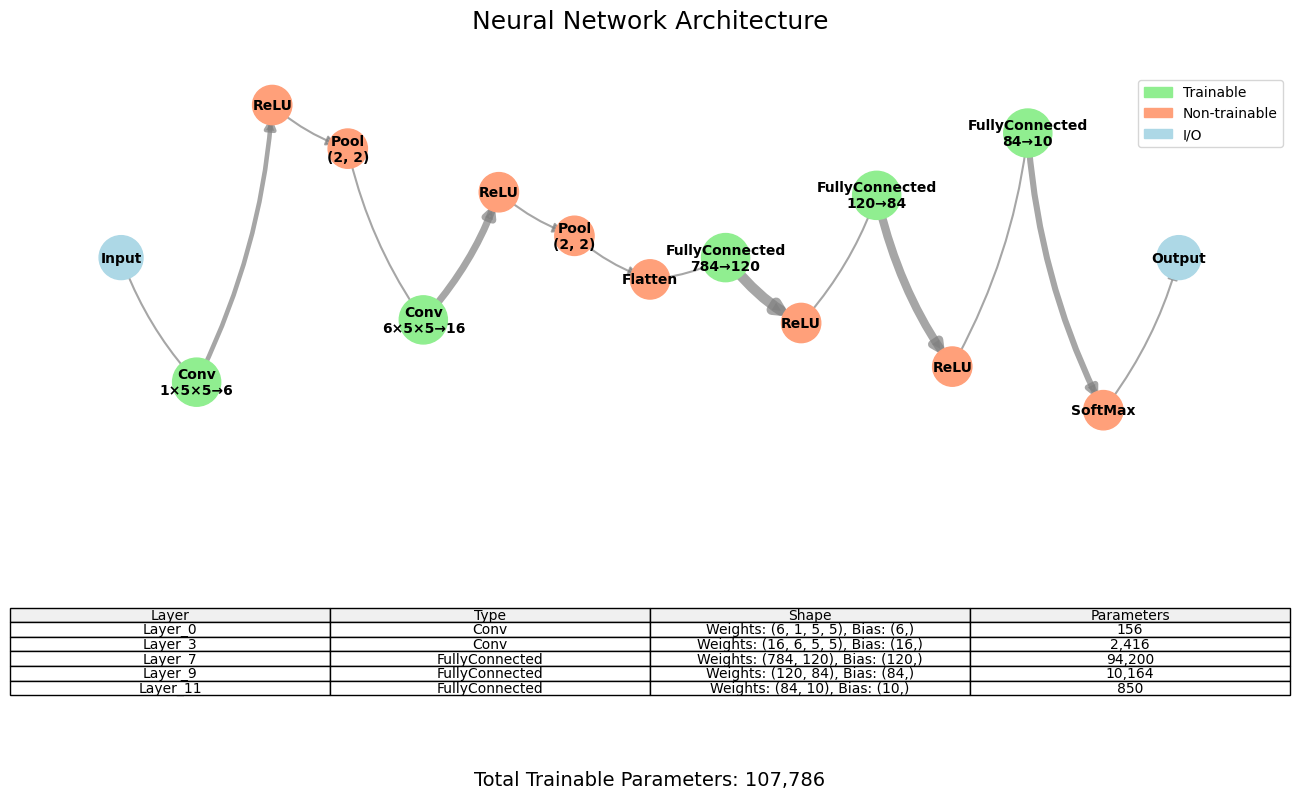

In [5]:
if os.path.isfile(os.path.join('../trained', 'LeNet')):
    net = NeuralNetwork.load(os.path.join('../trained', 'LeNet'), mnist)
    print("Loaded existing model")
else:
    net = build()
    net.data_layer = mnist
    print("Created new model")

print(type(net))
fig = net.plot()

Détection automatique du type de problème: classification (basé sur CrossEntropyLoss)
Validation set detected and will be used for display.
 Iteration |         Loss |  Train Acc (%) |  Val Acc (%) | Elapsed Time
-----------------------------------------------------------------
         0 |   128.306454 |          13.50 |        14.30 | 0.14s
        10 |   102.656675 |          35.40 |        32.30 | 3.26s
        20 |    83.579170 |          56.90 |        58.90 | 6.10s
        30 |    64.829868 |          70.30 |        71.60 | 10.60s
        40 |    43.943538 |          76.30 |        78.40 | 13.65s
        50 |    24.577008 |          80.00 |        79.60 | 16.17s
        60 |    42.936570 |          83.60 |        86.10 | 18.58s
        70 |    23.523428 |          84.20 |        86.20 | 21.10s
        80 |    27.626722 |          83.30 |        86.20 | 23.67s
        90 |    23.941864 |          83.70 |        83.80 | 26.20s
       100 |    15.203023 |          87.90 |        89

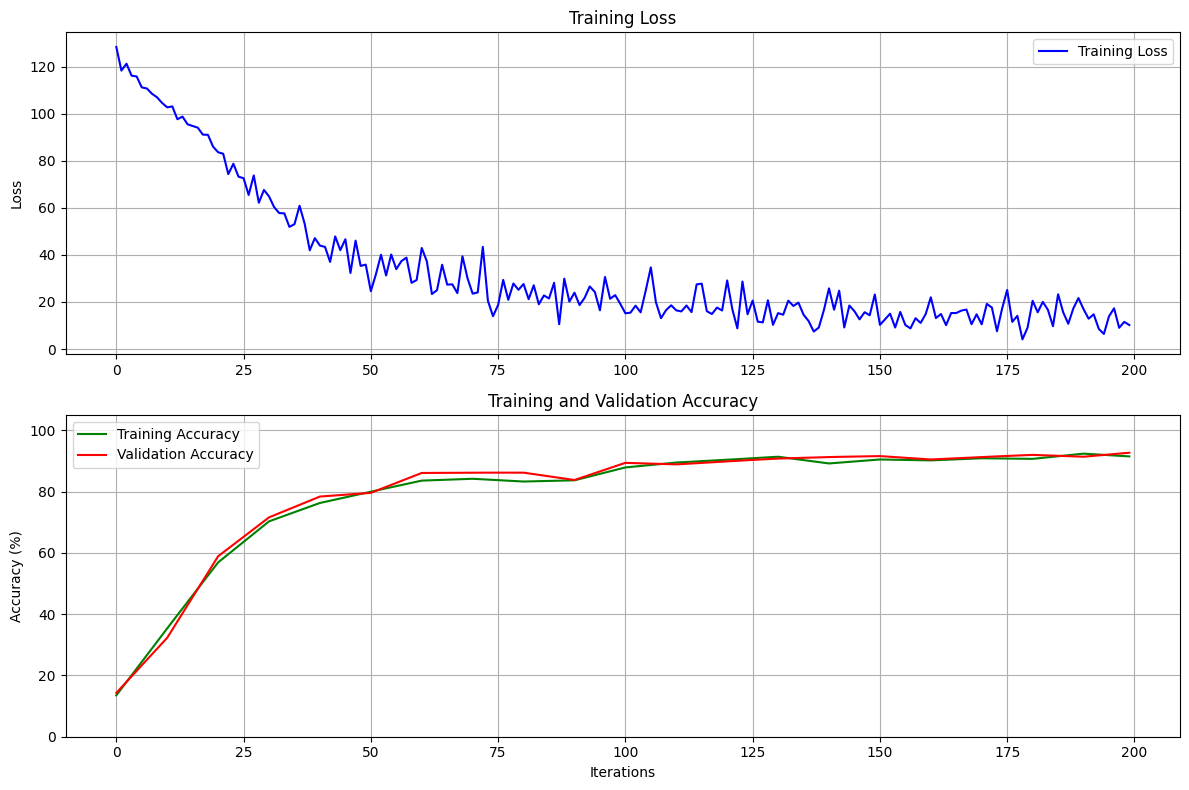

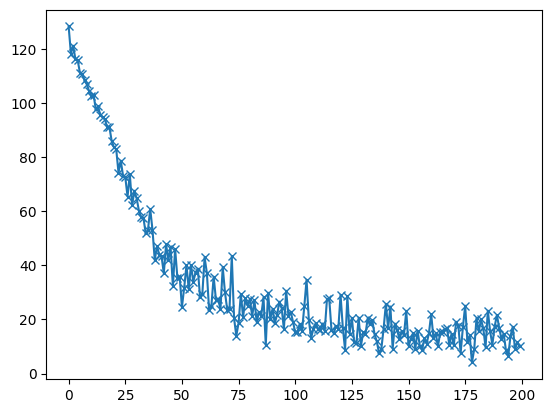

In [6]:
net.train(200)

plt.figure('Loss function for training LeNet on the MNIST dataset')
plt.plot(net.loss, '-x')
plt.show()

In [7]:
# Get the test set 
data, labels = net.data_layer.get_test_set()

# Test the network on the test set
results = net.test(data)
accuracy = Helpers.calculate_accuracy(results, labels)
print('\nOn the MNIST dataset, we achieve an accuracy of: ' + str(accuracy * 100) + '%')


On the MNIST dataset, we achieve an accuracy of: 92.33571428571429%


In [8]:
os.makedirs('../trained', exist_ok=True)
NeuralNetwork.save(os.path.join('../trained', 'LeNet'), net)